In [1]:
# Notebook to study the gammas emmited from the 2nubb events
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale
from matplotlib.cm import get_cmap

# Create a sequential colormap
cmap = get_cmap('Spectral')  # You can choose any sequential colormap here

# plt.rcParams["font.size"] = 15
# plt.rcParams["figure.figsize"] = 11,9

In [2]:
# Loading in the file
files = os.listdir("../data/nexus/1bar/")

# Get the single elctron efiles
files = [filename for filename in files if 'single' in filename]
files = sorted(files)

files.append("xesphere_bb_1_bar_2.5_MeV.h5")

print(files)

config_v = []
parts_v  = []
hits_v   = []
energy_v = []
pressure_v = []
 
 
for index, f in enumerate(files):
    config_v.append(pd.read_hdf("../data/nexus/1bar/" + f, 'config'))
    parts_v .append(pd.read_hdf("../data/nexus/1bar/" + f, 'parts'))
    hits_v  .append(pd.read_hdf("../data/nexus/1bar/" + f, 'hits'))

    eventtype = config_v[index][config_v[index]["param_key"] == "/nexus/RegisterGenerator"].iloc[0]['param_value']

    if (eventtype == "Decay0Interface"):
        eventtype = "bb"
        energy = "0nuBB"
        energy_v.append(energy)
    else:
        eventtype = "singleeminus"

        # Then also get the energy
        energy = config_v[index][ config_v[index]["param_key"] == "/Generator/SingleParticle/min_energy"].iloc[0]['param_value']
        energy = [float(num) if '.' in num else int(num) for num in energy.split() if num.replace('.', '', 1).isdigit()]
        energy_v.append(energy[0])
        print(energy[0])

    pressure = config_v[index][ config_v[index]["param_key"] == "/Geometry/XeSphere/pressure"].iloc[0]['param_value']
    pressure = [float(num) if '.' in num else int(num) for num in pressure.split() if num.replace('.', '', 1).isdigit()]
    pressure = f"{int(pressure[0])}_bar"
    pressure_v.append(pressure)

display(config_v[0])


['xesphere_singleeminus_1_bar_0.1_MeV.h5', 'xesphere_singleeminus_1_bar_0.25_MeV.h5', 'xesphere_singleeminus_1_bar_0.5_MeV.h5', 'xesphere_singleeminus_1_bar_1_MeV.h5', 'xesphere_singleeminus_1_bar_2.5_MeV.h5', 'xesphere_bb_1_bar_2.5_MeV.h5']
0.1
0.25
0.5
1
2.5


,param_key,param_value
0,event_type,background
1,num_events,5000
2,saved_events,5000
3,interacting_events,5000
4,/PhysicsList/RegisterPhysics,G4EmStandardPhysics_option4
5,/PhysicsList/RegisterPhysics,G4DecayPhysics
6,/PhysicsList/RegisterPhysics,G4RadioactiveDecayPhysics
7,/PhysicsList/RegisterPhysics,NexusPhysics
8,/PhysicsList/RegisterPhysics,G4StepLimiterPhysics
9,/nexus/RegisterGeometry,XeSphere


In [ ]:
## Particles
print(parts_v[0].particle_name.unique())
display(parts_v[0][parts_v[0]["particle_name"] == "gamma"])
display(parts_v[0].head(4))

print(parts_v[5].final_y.min())

In [5]:
# Plot the distance of the gammas and bin in a histogram
gammas_v = []

for df in parts_v:
    gammas_v.append(df[df["particle_name"] == "gamma"])


In [ ]:
plt.figure()

dist_counts_v = []
dist_bins_v = []

pd.options.mode.chained_assignment = None  # Set it to "None" to disable the warning

for index, g in enumerate(gammas_v):
    deltax = g['final_x'] - g['initial_x']
    deltay = g['final_y'] - g['initial_y']
    deltaz = g['final_z'] - g['initial_z']

    # g['distances'] = np.sqrt(g['final_x']*g['final_x'] + g['final_y']*g['final_y'] + g['final_z']*g['final_z'])/1000
    g['distances'] =  np.sqrt( deltax**2 + deltay**2 + deltaz**2 )/1000
    # print(distances)

    bin_edges = np.linspace(0, g['distances'].max(), 50000);
    # bin_edges = np.linspace(0, 20, 10000);

    counts, bins, _ = plt.hist(g['distances'] , bins = bin_edges, histtype='step', label = f"{energy_v[index]} MeV", color=cmap(index/len(gammas_v)))

    dist_counts_v.append(counts)
    dist_bins_v.append(bins)

plt.xlabel("Gamma Distance [m]")
# plt.xlim(0, gammas_v[4].distances.max()) 
plt.ylabel("Entries")
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.title(f"Pressure: {pressure_v[0]}")
plt.legend()

In [ ]:
display(gammas_v[5][ (gammas_v[5]["kin_energy"] < 0.025)])

In [ ]:
# Make a 2D plot of the gamma energy vs gamma distance

#Separate out the types of gammas
# other   = gammas[  gammas['creator_proc'] == "none"]
# eIoni   = gammas[  gammas['creator_proc'] == "eIoni"]
# eBrem   = gammas[  gammas['creator_proc'] == "eBrem"]
# phot    = gammas[  gammas['creator_proc'] == "phot"]
# compt   = gammas[  gammas['creator_proc'] == "compt"]
# conv    = gammas[  gammas['creator_proc'] == "conv"]
# annihil = gammas[  gammas['creator_proc'] == "annihil"]

eBrems = []

plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

for index, g in enumerate(gammas_v):
    eBrems.append(g[ g['creator_proc'] == "eBrem"])

    plt.subplot(2, 3, index+1)
    plt.hist2d(eBrems[index]['kin_energy'],   eBrems[index]['distances'],  bins=(100,100), norm=LogNorm(), cmap = "viridis");

    # Create a color bar to the right of the plot
    cbar = plt.colorbar(label='Events', location='right')

    # plt.xlim(0, 0.2)
    # plt.ylim(0,5)
    plt.xlabel("Kinetic Energy [MeV]")
    plt.ylabel("Brem Distance [m]");
    plt.title( f"E = {energy_v[index]} MeV, {pressure_v[0]}")


In [ ]:
# Print stupendous events
print(eBrems[4][eBrems[4]['distances'] > 40].event_id.unique())

In [ ]:
# Plt the bremstrahlung frequency per event

display(eBrems[3])

df = eBrems[3]

bin_edges = np.arange(-0.5, 9.5, 1)
bin_centers = np.arange(0, 9, 1)


plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

for index, df in enumerate(eBrems):

    eventids = df.event_id.unique()

    n_photon_v = []

    for e in eventids:
        temp_df = df[ df["event_id"] == e]
        n_photon_v.append(len(temp_df))

    plt.subplot(2, 3, index+1)
    plt.hist(n_photon_v, bins = bin_edges, label = f"{energy_v[index]} MeV", color=cmap(index/len(eBrems)))

    plt.xlabel("N Brems")
    plt.ylabel("Entries")
    plt.legend()
    plt.xticks(bin_centers) 
    plt.title( f"Pressure:  {pressure_v[0]}")


In [ ]:
# Plot the gamma ray energy

plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

counts_v = []
bins_v = []


for index, df in enumerate(eBrems):

    n_photon_v = []
    plt.subplot(2, 3, index+1)
    bin_edges = np.linspace(0, df["kin_energy"].max(), 100);
    # bin_edges = np.linspace(0, 0.03, 100);
    counts, bins, _  = plt.hist(df["kin_energy"], bins = bin_edges, label = f"{energy_v[index]} MeV", color=cmap(index/len(eBrems)));
    counts_v.append(counts)
    bins_v.append(bins)

    plt.xlabel("Brem Energy [MeV]")
    plt.ylabel("Entries")
    plt.title( f"Pressure:  {pressure_v[0]}")
    plt.legend()

In [ ]:

cum_sum = []

cumalative = 0

# Loop over the bin edges and integrate
for index, c in enumerate(counts_v):
    print(index)

    cum_sum.append(np.zeros(len(c)))
    cumalative = 0

    for j, sum_ in enumerate(c):
        cumalative+=sum_
        cum_sum[index][j]+=cumalative

    cum_sum[index]/=np.sum(c)
    cum_sum[index]*=100


plt.figure(figsize=(18, 10))  
for index, sums in enumerate(cum_sum):
    plt.subplot(2, 3, index+1)
    bin_centers = [(bins_v[index][i] + bins_v[index][i+1]) / 2 for i in range(len(bins_v[index]) - 1)]
    bin_centers = np.array(bin_centers)
    plt.plot(100*bin_centers/2.458, sums, label = f"{energy_v[index]} MeV", color=cmap(index/len(cum_sum)), linewidth = 3)
   
    plt.xlim(0, 8)
    plt.xlabel("Fraction of 0nuBB energy radiated [%]")
    plt.ylabel("Percentage of all brems")
    plt.title( f"Pressure:  {pressure_v[0]}")
    plt.legend()
    plt.grid(True)


In [ ]:
# Same again but with bremstrahlung distance

cum_sum = []

cumalative = 0

# Loop over the bin edges and integrate
for index, c in enumerate(dist_counts_v):
    print(index)

    cum_sum.append(np.zeros(len(c)))
    cumalative = 0

    for j, sum_ in enumerate(c):
        cumalative+=sum_
        cum_sum[index][j]+=cumalative

    cum_sum[index]/=np.sum(c)
    cum_sum[index]*=100


plt.figure(figsize=(18, 10))  
for index, sums in enumerate(cum_sum):
    plt.subplot(2, 3, index+1)
    bin_centers = [(dist_bins_v[index][i] + dist_bins_v[index][i+1]) / 2 for i in range(len(dist_bins_v[index]) - 1)]
    plt.plot(bin_centers, sums, label = f"{energy_v[index]} MeV", color=cmap(index/len(cum_sum)), linewidth = 3)
   

    plt.xlim(0, 3)
    plt.xlabel("Brem Distance [m]")
    plt.ylabel("Percentage of all brems")
    plt.title( f"Pressure:  {pressure_v[0]}")
    plt.legend()
    plt.grid(True)


In [ ]:
# get the hits of a specific event
category = 5

evt      = 10
evt_hits = hits_v[category][(hits_v[category].event_id == evt)]
x = evt_hits.x/1000
y = evt_hits.y/1000
z = evt_hits.z/1000
t = evt_hits.time
e = evt_hits.energy*1000

display(gammas_v[category][gammas_v[category]["event_id"] == evt])
display(parts_v[category][(parts_v[category]["event_id"] == evt) & (parts_v[category]["primary"] == 1)])

In [ ]:
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

x_range = (x.max()-x.min()) * 0.5
y_range = (y.max()-y.min()) * 0.5
z_range = (z.max()-z.min()) * 0.5
mid_x = (x.max()+x.min()) * 0.5
mid_y = (y.max()+y.min()) * 0.5
mid_z = (z.max()+z.min()) * 0.5
ax.set_xlim(mid_x - x_range, mid_x + x_range)
ax.set_ylim(mid_y - y_range, mid_y + y_range)
ax.set_zlim(mid_z - z_range, mid_z + z_range)

# ax.set_xlim(-0.2, 0.2)
# ax.set_ylim(-0.2, 0.2)
# ax.set_zlim(-0.2, 0.2)

fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('white')  # Set the background color to white

p = ax.scatter(x,y,z,cmap='viridis',c=e, s=1, zorder=2) #coolwarm
ax.scatter(0,0,0,c="red", s=5, zorder=1) #coolwarm
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy [keV]')
ax.set_title(f"Event: {evt}")
plt.savefig(f"../plots/events/event_{evt}_P{pressure_v[0]}_E_{energy_v[category]}.png", dpi = 800, transparent=False)

plt.show()

In [ ]:
r0 = np.array([0.011529, 0.093824])
r1 = np.array([0.022936, 0.170519])
r2 = np.array([0.0067319, 0.249209])

v1 = np.subtract(r1, r0)
v2 = np.subtract(r2, r1)
print(v1, v2)

v1_mag = np.sqrt(v1[0]**2 + v1[1]**2)
v2_mag = np.sqrt(v2[0]**2 + v2[1]**2)
print(v1_mag, v2_mag)

costheta =  (v1[0]*v2[0] + v1[1]*v2[1]) / ( v1_mag * v2_mag )
print(costheta)
print(np.arccos(costheta) * 180/np.pi)


In [ ]:
# Estimate the ranges for a gamma in 1 bar xenon

# Sigma [MBarnes], Percentage of events contained
def gamma_range(sigma, prob):
    return 0.01*1/(26.87*sigma)*np.log(1/(1 - 0.01*prob))

# Sigma [MBarnes], Percentage of events contained
def gamma_containment(sigma, distance):
    return 100* (1 - np.exp(-26.87*sigma*distance))


Gamma_energies = [10, 100, 200, 300, 400, 1000]
absorb_cross = [2e-2, 4e-4, 1e-4, 4e-5, 3e-5, 0.5e-5]

print(gamma_range(4e-4, 90))

plt.figure(figsize=(9,6))
plt.plot(Gamma_energies, gamma_range(np.array(absorb_cross), np.full(len(absorb_cross), 90)), linewidth = 3, color = cmap(0));
plt.xlabel("Brem Energy [keV]",fontsize=20)
plt.ylabel("Brem distance 90% containment [m]",fontsize=20);
plt.yticks(fontsize=20);  # Set the y tick label size to 12
plt.xticks(fontsize=20);  # Set the x tick label size to 12


plt.figure(figsize=(9,6))
plt.plot(Gamma_energies, gamma_containment(np.array(absorb_cross), np.full(len(absorb_cross), 250)  ), linewidth = 3, color = cmap(0));
plt.xlabel("Brem Energy [keV]",fontsize=20)
plt.ylabel("Percentage of events contained in 2.5 m [%]",fontsize=20);
plt.yticks(fontsize=20);  # Set the y tick label size to 12
plt.xticks(fontsize=20);  # Set the x tick label size to 12


In [ ]:
# Get the mean energies for each event without including the bremstrahlung energy

parts_nobrem = []

for index, df in enumerate(parts_v):
    parts_nobrem.append(df[ df['particle_name'] != "gamma"])

In [ ]:
display(parts_v[0][ (parts_v[0]["particle_name"] == "gamma") &  (parts_v[0]["event_id"] == 1) ] )
display(parts_v[0][ (parts_v[0]["mother_id"] == 84) | (parts_v[0]["mother_id"] == 85) ] )



In [ ]:
# event = parts_nobrem[0][parts_nobrem[0]["event_id"] == 1]
event = hits_v[0][hits_v[0]["event_id"] == 1]
pd.set_option('display.max_rows', None)
display(event[ event.particle_id == 82  ])


energy = event.energy.sum()
print(energy)

In [4]:
# For loop and get all the daughters from a gamma
category = 4

event_parts = parts_v[category][parts_v[category]["event_id"] == 16]
event_hits  = hits_v[category][hits_v[category]["event_id"] == 16]

event_list = parts_v[category].event_id.unique()
print(event_list)
event_energies = []

for index, e in enumerate(event_list):
    print(index)

    if (index > 1000): 
        break

    event_parts = parts_v[category][parts_v[category]["event_id"] == e]
    event_hits =  hits_v[category][hits_v[category]["event_id"] == e]

    # First get the gamma index
    gamma_ids = event_parts[event_parts["particle_name"] == "gamma" ].particle_id.values
    daughters = event_parts[event_parts["mother_id"].isin(gamma_ids)].particle_id.values
    # print(gamma_ids)
    # print(daughters)
    all_ids = []

    temp_daughters = daughters

    while (True):
        sub_daughters = event_parts[event_parts["mother_id"].isin(temp_daughters)].particle_id.values
        # print(sub_daughters)

        if (len(sub_daughters) ==  0):
            all_ids = np.concatenate((gamma_ids, daughters))
            event_hits = event_hits[~event_hits["particle_id"].isin(all_ids)]
            event_energy = event_hits.energy.sum()
            print(event_energy)
            event_energies.append(event_energy)
            break

        else:
            daughters = np.concatenate((daughters, sub_daughters))
            daughters = np.unique(daughters)
            temp_daughters = sub_daughters
            print("Looping through", index)
            sub_daughters = []


# print("done")

# print(sub_daughters)
# print(all_ids)
print("Mean Event Energy: ", event_energy.mean())

[   0    1    2 ... 4997 4998 4999]
0
Looping through 0
Looping through 0
Looping through 0
1.8818127
1
Looping through 1
2.4382534
2
2.4901624
3
Looping through 3
Looping through 3
2.4710307
4
2.490336
5
Looping through 5
Looping through 5
2.3187904
6
Looping through 6
Looping through 6
2.3726616
7
Looping through 7
Looping through 7
2.1042345
8
Looping through 8
Looping through 8
2.1225522
9
Looping through 9
Looping through 9
Looping through 9
Looping through 9
Looping through 9
1.8511531
10
Looping through 10
Looping through 10
2.2046156
11
Looping through 11
Looping through 11
2.429616
12
2.49867
13
Looping through 13
Looping through 13
Looping through 13
Looping through 13
1.6686562
14
2.4740207
15
Looping through 15
Looping through 15
2.422289
16
2.4840662
17
Looping through 17
2.4959028
18
Looping through 18
2.4838135
19
2.486095
20
Looping through 20
Looping through 20
Looping through 20
2.4226644
21
Looping through 21
Looping through 21
Looping through 21
Looping through 21
1

Text(0, 0.5, 'True Energy - Brem Energy [MeV]')

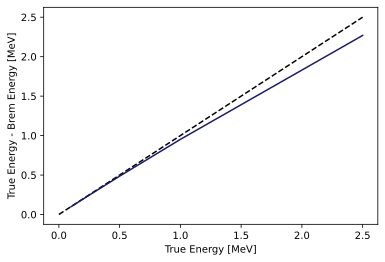

: 

In [17]:
# Calculate the energy radiated away from bremsstrahlung radiation
energy_no_brem = []
energy_no_brem.append( (0.1 * 5000 - gammas_v[0].kin_energy.sum()) / 5000)
energy_no_brem.append( (0.25 * 5000 - gammas_v[1].kin_energy.sum()) / 5000)
energy_no_brem.append( (0.5 * 5000 - gammas_v[2].kin_energy.sum()) / 5000)
energy_no_brem.append( (1 * 5000 - gammas_v[3].kin_energy.sum()) / 5000)
energy_no_brem.append( (2.5 * 5000 - gammas_v[4].kin_energy.sum()) / 5000)

energies =  [0.1, 0.25, 0.5, 1, 2.5]

# Create an array of x values
x = np.linspace(0, 2.5, 100)  # Create 100 points between -5 and 5
y = x

plt.figure()
plt.plot(x, y, '--', color = 'black')
plt.plot(energies ,energy_no_brem, color = "midnightblue")
plt.xlabel("True Energy [MeV]")
plt.ylabel("True Energy - Brem Energy [MeV]")

